In [1]:
"""
markets.ipynb

Jupyter Notebook to perform analysis on card market data.

Author: Jordan Bourdeau
Date Created: 4/7/24
"""

'\nmarkets.ipynb\n\nJupyter Notebook to perform analysis on card market data.\n\nAuthor: Jordan Bourdeau\nDate Created: 4/7/24\n'

In [2]:
# Imports
import datetime
import json 
from matplotlib import pyplot as plt
import numpy as np
import os 
import pandas as pd

from src import constants as c
import src.calculate.calculate_market_data as cmd
import src.load.load_price_data as lpd
import src.load.load_set_data as lsd
import src.load.load_utils as load_utils
import src.plot.plot_set_data as psd

### Get a DataFrame with a card name, lowest price + the set it's from, UUID, and release year

Note: Some cards may not have a MTGO online version, for instance if there is a full art version only sold in paper copies.

In [3]:
# Load dataset
all_printings_filepath: str = os.path.join(c.DATA_DIRECTORY, 'AllPrintings.json')
all_printings: dict = load_utils.load_json_data(all_printings_filepath)

In [4]:
card_price_df: pd.DataFrame = lpd.load_card_price_df()
card_price_df.head()

,card,set,uuid,price,rarity,currency,date,foil,release_year
0,Thundering Mightmare,VOC,f3a63045-2260-518e-881b-23a0c11d7327,0.1,rare,USD,2024-03-23,normal,2021
1,"Timin, Youthful Geist",VOC,d5d365d0-9026-5386-be59-5d8fd9f5caa3,0.1,rare,USD,2024-03-23,normal,2021
2,Haunted Library,VOC,9dcc9264-826f-5308-8027-ab4f88d4db9f,0.1,rare,USD,2024-03-23,normal,2021
3,Scion of Opulence,VOC,4aee0816-a8e6-5cc7-b5ae-c98f959c8ddb,0.1,rare,USD,2024-03-23,normal,2021
4,Markov Enforcer,VOC,24dfb421-6dfb-5d36-a995-a47076933ee5,0.1,rare,USD,2024-03-23,normal,2021


In [5]:
aggregate_data: pd.DataFrame = cmd.calculate_aggregate_set_prices(card_price_df)
aggregate_data.head()

,set_code,mean_price,median_price,std_price
128,MPS,7.285,7.285,4.646
22,BOT,6.240,3.710,6.332
70,EXP,5.550,1.190,9.255
10,AFC,5.452,3.110,4.777
124,MOC,4.794,4.020,5.024


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/jordan/Projects/DS-final-CForey-Jbourds/src/plot/plot_set_data.py:138: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


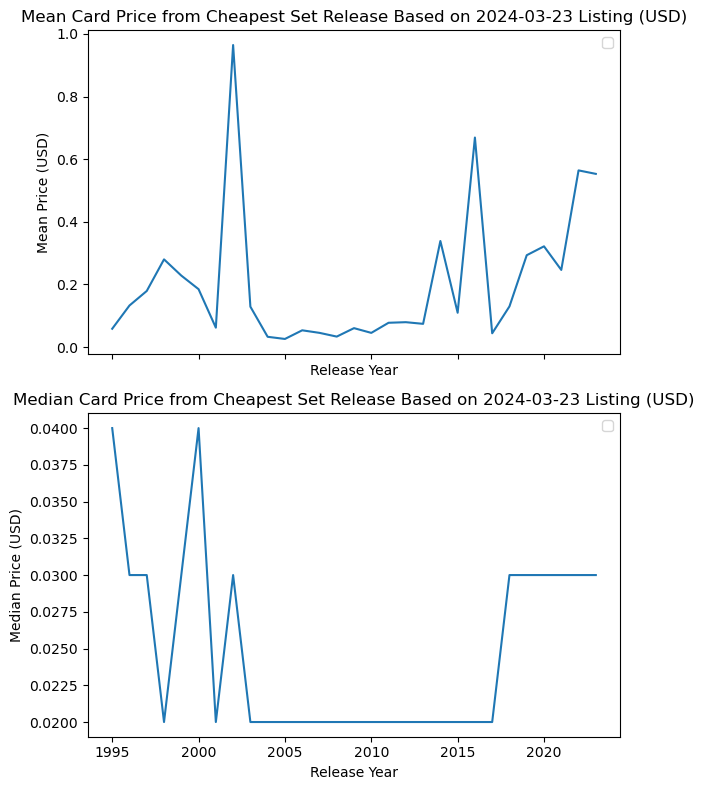

In [6]:
psd.plot_average_card_price_over_time(card_price_df, datetime.date(2024, 3, 23))

In [7]:
# Augmenting set data with tournament data and number of banend cards
augmented_data: pd.DataFrame = lsd.load_augmented_set_data(all_printings, 'modern')
augmented_data[augmented_data['set_code'] == 'MH2']

,set_code,total_count,set_name,num_banned,release_year,release_month,set_size,mean_price,median_price,std_price
54,MH2,116020,Modern Horizons 2,2,2021,6,303,0.382,0.03,1.898


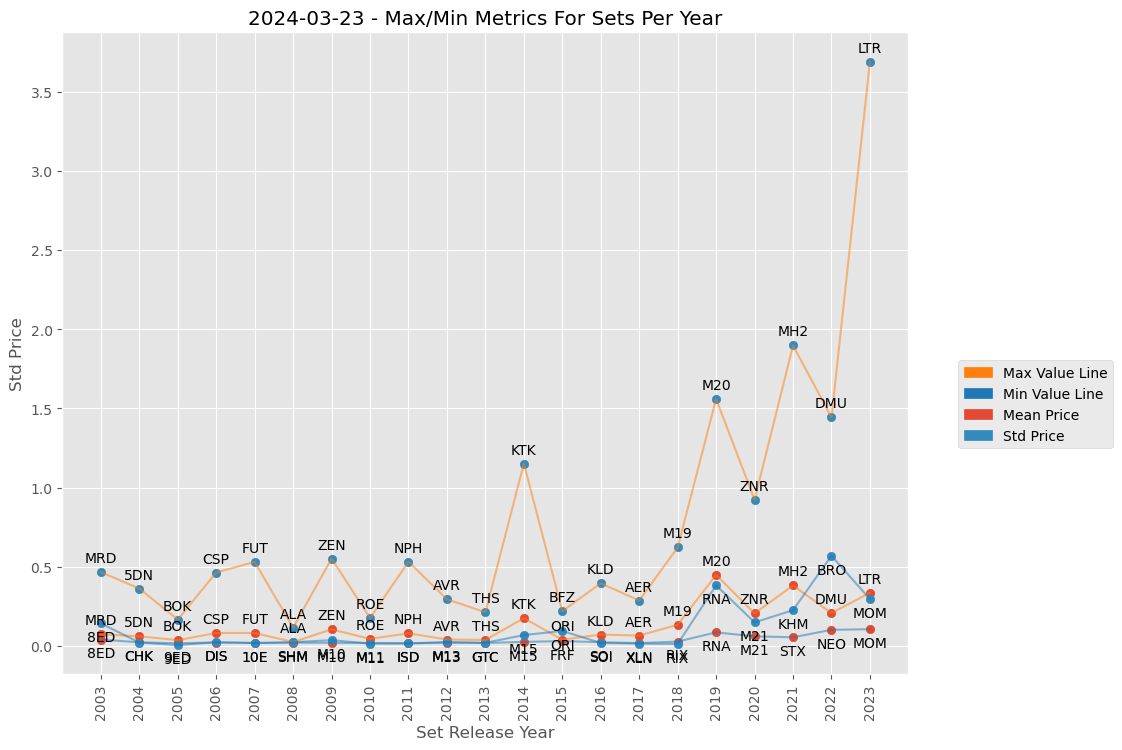

In [107]:
from importlib import reload
reload(psd)

metrics: list[str] = ['mean_price', 'std_price']
psd.plot_superimposed_max_min_metrics_by_year(augmented_data, metrics, datetime.date(2024, 3, 23))

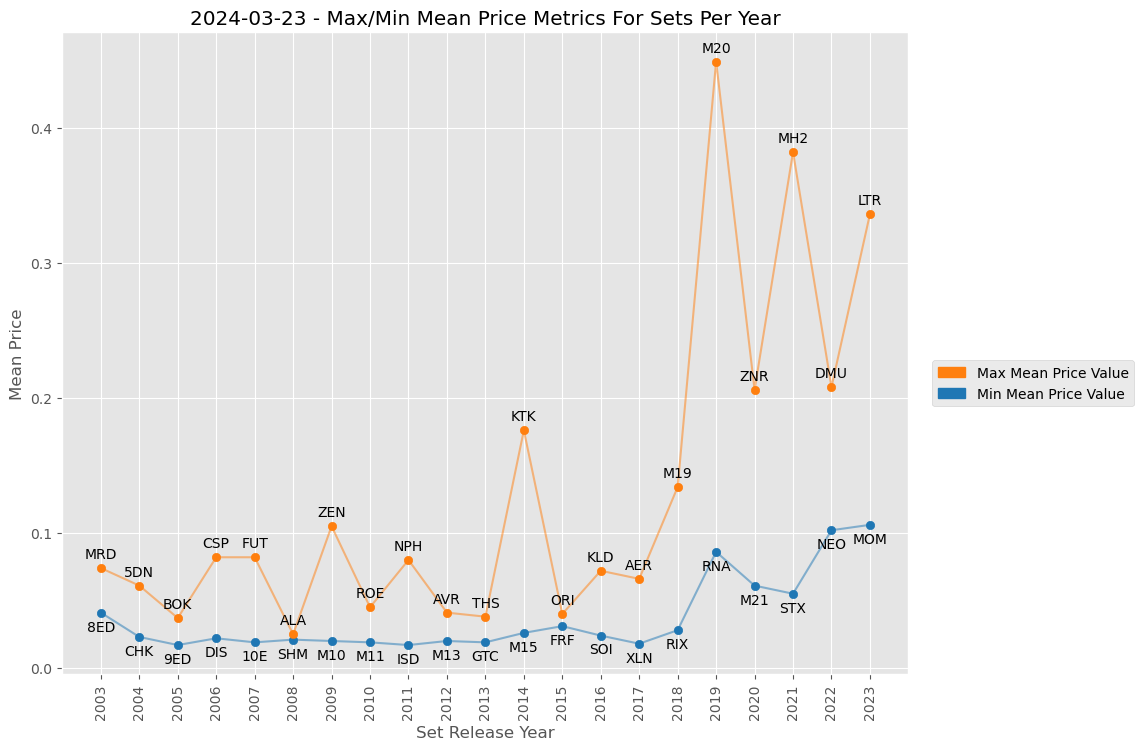

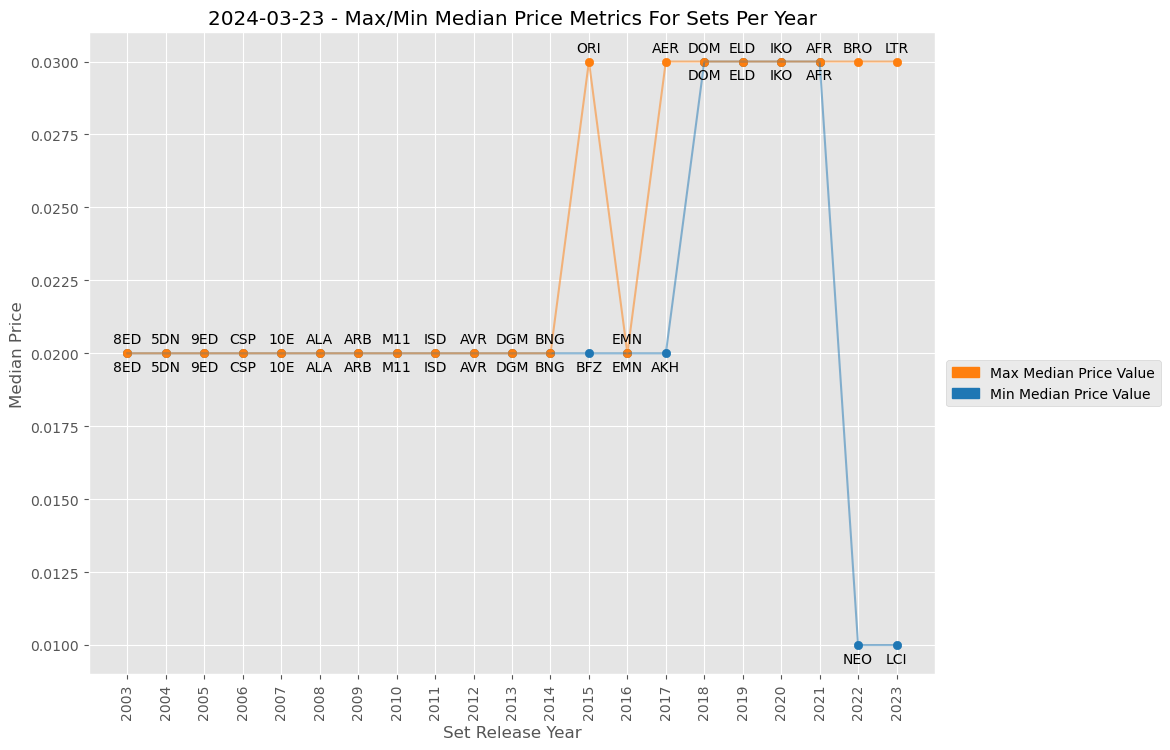

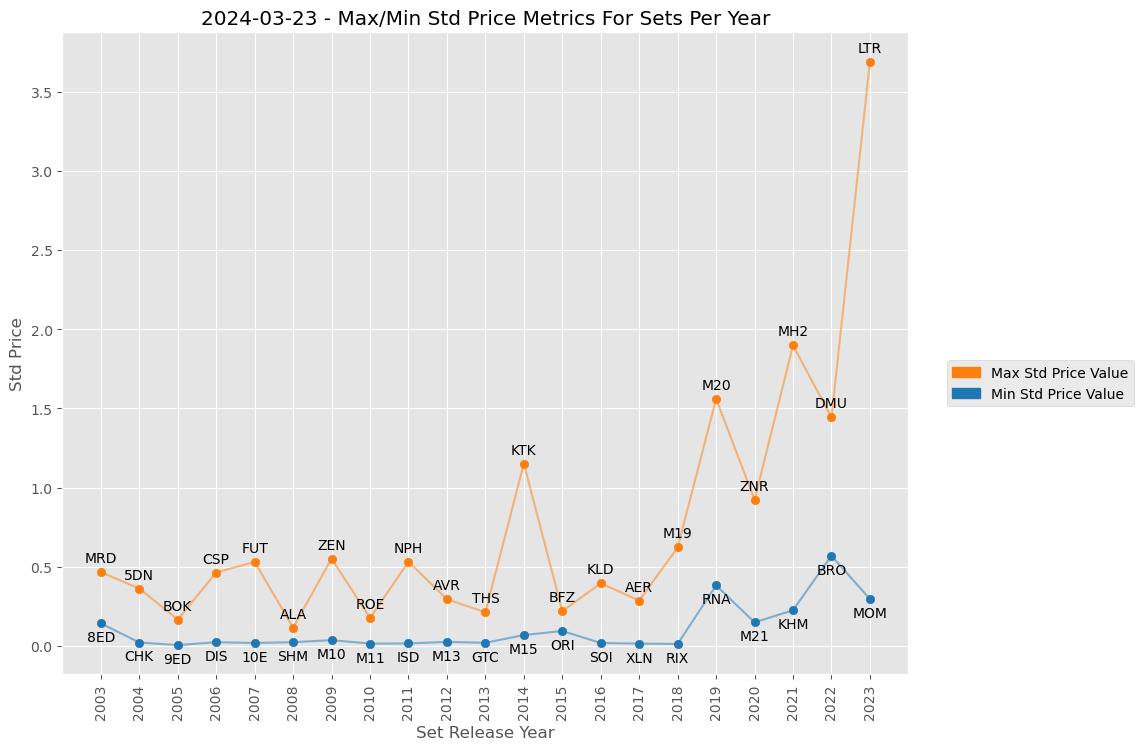

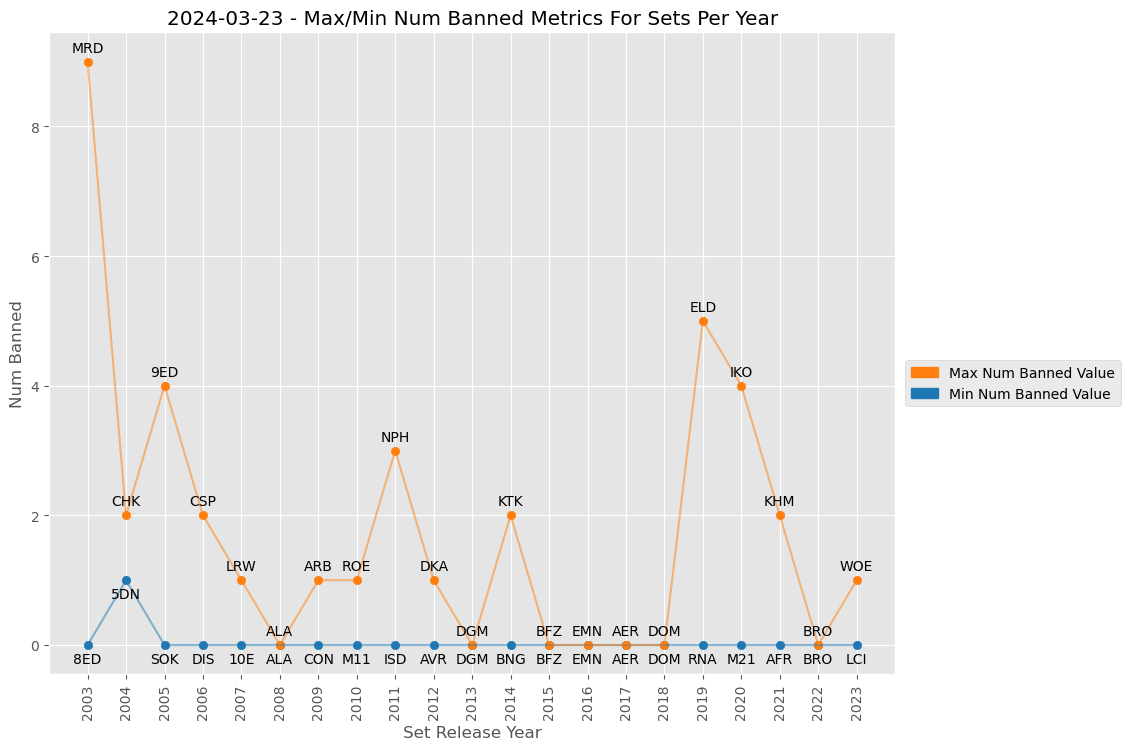

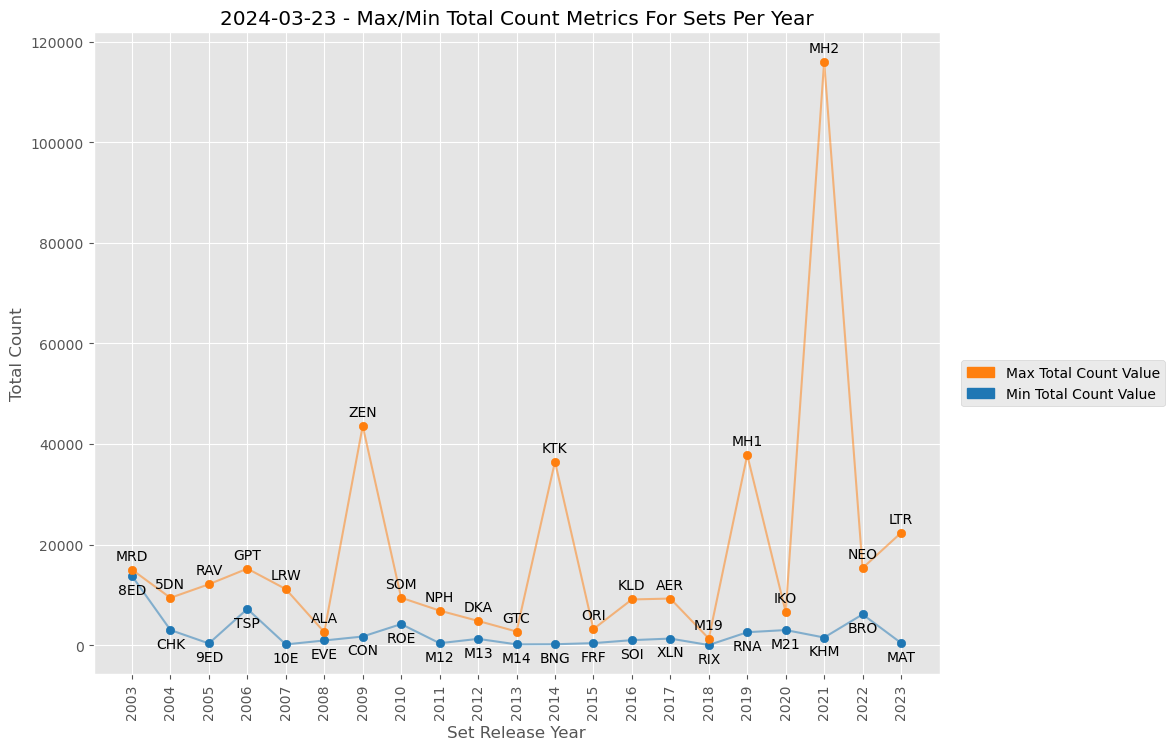

In [108]:
from importlib import reload
reload(psd)

metrics: list[str] = ['mean_price', 'median_price', 'std_price', 'num_banned', 'total_count']
psd.plot_max_min_metrics_by_year(augmented_data, metrics, datetime.date(2024, 3, 23))